# We try to make a CNN to predict hand drawn numbers usint the mnist dataset

(60000, 28, 28)
(10000, 28, 28)


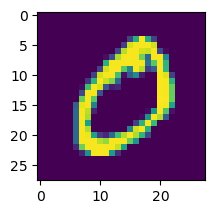

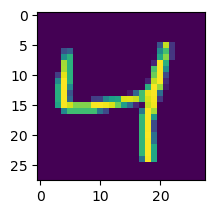

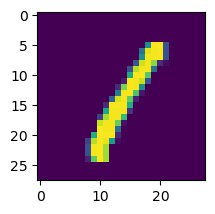

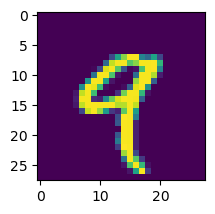

In [2]:
#loading data
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt


(xtrain,ytrain),(xtest,ytest) = mnist.load_data()



plt.show()
print(xtrain.shape)
print(xtest.shape)
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(xtrain[i])
    plt.show()

#preprocessing data
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1) #adding extra dimension for convolutional layer
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)

#uniformizing the input data so that it can be used on images later
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

# convert class vectors to binary class matrices
ytrain = keras.utils.to_categorical(ytrain, num_classes=10, dtype ="int32")
ytest = keras.utils.to_categorical(ytest, num_classes=10, dtype ="int32")



In [8]:
#creating CNN to classify the data
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics

#defining our model as a sequential neural network
clf = Sequential()

#adding the convolution layer
clf.add(Convolution2D(24,3,3,input_shape=(28,28,1),activation ='relu'))
#adding pooling and flattening layers
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Flatten())
clf.add(Dense(units=256, activation = 'relu'))
clf.add(Dense(units =128 , activation = 'relu'))
#adding fully connected layer and output layer
clf.add(Dense(units = 64 ,activation = 'relu'))
clf.add(Dense(10 , activation ='sigmoid'))
#compiling CNN
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
#fitting the CNN
clf.fit(xtrain,ytrain , epochs=5, validation_data = (xtest,ytest))



Epoch 1/5
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0684 - accuracy: 0.8766 - val_loss: 0.0312 - val_accuracy: 0.9464
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0245 - accuracy: 0.9582 - val_loss: 0.0198 - val_accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0183 - accuracy: 0.9686 - val_loss: 0.0174 - val_accuracy: 0.9711
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0142 - accuracy: 0.9754 - val_loss: 0.0153 - val_accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0118 - accuracy: 0.9804 - val_loss: 0.0159 - val_accuracy: 0.9733


313/313 [==============================] - 2s 5ms/step


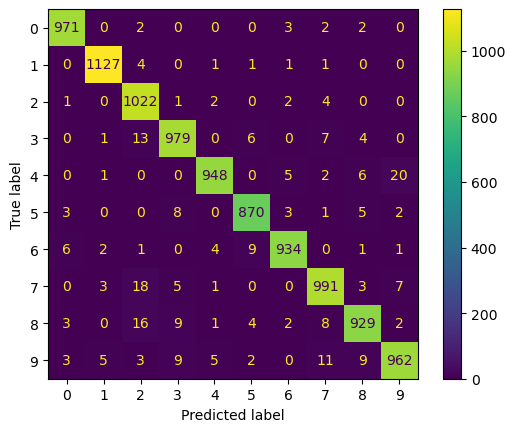

In [9]:
#Creating a confusion matrix to better understand how to optimise the Neural Network
pred = clf.predict(xtest)
out_pred = []
for i in pred:
    m = max(i)
    temp =[]
    for j in i:
        if j == m:
            temp.append(1)
        else :
            temp.append(0)
    out_pred.append(temp)
           
confusion_matrix = metrics.confusion_matrix(ytest.argmax(axis =1), pred.argmax(axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9]) 
cm_display.plot()
plt.show() 

# From the confusion matric it appears 2 is poorly predicted, so we test it.

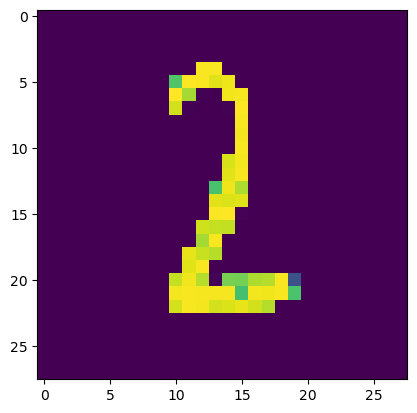

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
#making predictions on new images
import tensorflow as tf
import numpy as np


#importing new images
image_2 = keras.utils.load_img('2No.jpg',target_size = (28,28),color_mode ='grayscale')
image_2 = np.invert(image_2)
plt.imshow(image_2)
plt.show()

image_2 = keras.preprocessing.image.img_to_array(image_2)
image_2 = np.expand_dims(image_2,axis = 0)
clf.predict(image_2)

# The CNN is able to correctly predict the 2 in this case.